## Load Data File

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator

#logfile_path = 'data/20-05-10/Viviane_Tennis_20200510_173107.csv'
logfile_path = 'data/20-05-10/Viviane_Tennis_20200510_173411.csv'
#logfile_path = 'data/20-05-10/Viviane_Tennis_20200510_173726.csv'
#logfile_path = 'data/20-05-10/Viviane_Tennis_20200510_174150.csv'
#logfile_path = 'data/20-05-10/Viviane_Tennis_20200510_174601.csv'


df = pd.DataFrame(pd.read_csv(logfile_path))
print(df.iloc[0:10, 0:len(df)])

   Timestamp             Mode  Index Ball_State  Ball_Pos_X  Ball_Pos_Y  \
0   26.74042    DeviationTest      0     Hidden    0.250000    1.028827   
1   28.88047    DeviationTest      1     Hidden   -0.250000    1.028827   
2   30.96052    DeviationTest      2     Hidden    0.000000    1.028827   
3   33.04057    DeviationTest      3     Hidden    0.000000    1.028827   
4   35.08061    DeviationTest      4     Hidden    0.250000    1.028827   
5   37.14066    DeviationTest      5     Hidden   -0.250000    1.028827   
6   44.32082  PrismAdaptation      0     Caught    0.206799    1.163250   
7   46.82088  PrismAdaptation      1     Caught   -0.110134    0.898257   
8   49.54094  PrismAdaptation      2     Caught   -0.162371    1.005884   
9   52.20100  PrismAdaptation      3     Caught   -0.143714    0.970391   

   Ball_Pos_Z  Hand_Pos_X  Hand_Pos_Y  Hand_Pos_Z  Shift  Cumulative_Omission  
0    0.501640    0.266121    1.043156    0.404332    -10                  NaN  
1    0.501640 

In [2]:
# Global Variable
ball_radius = 0.08;
hand_radius = 0.1;
#arm_length = 0.49;
arm_length = 0.51;


#Utils Figure
alpha_hand = 0.2;
def set_size(w,h, ax=None):
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
def create_fig(xlim = [0,10], ylim=[0,10], equal = False):
    fig = plt.figure()
    ax = fig.gca()
    if equal:
        ax.axis('equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax;
    #ax.margins(1, 1)   

## Display Shift

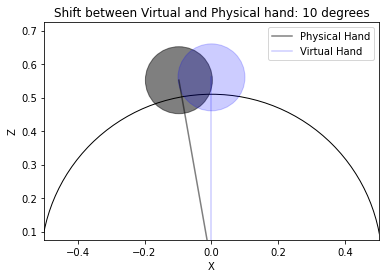

In [3]:
# N iteration
n_iteration = int(len(df.loc[df['Mode'] == "DeviationTest"])/2)
epsilon = 0.04
shift = -df['Shift'].iloc[1] # *(-1) inverse transformation as the position of the virtual hand was saved

def apply_shift(pos, shift):
    angle = np.arctan(pos["Ball_Pos_Z"] / pos["Ball_Pos_X"])  
    radius = pos["Ball_Pos_Z"] / np.sin(angle)
    angle_prime = angle + np.deg2rad(shift);    
    pos_prime = pos.copy();
    pos_prime["Ball_Pos_X"] = np.cos(angle_prime) * radius;
    pos_prime["Ball_Pos_Z"] = np.sin(angle_prime) * radius;
    return pos_prime;
    
def draw_virtual_versus_physical_hand(virtual_hand_pos,physical_hand_pos, title):
    ax = create_fig([-0.5,0.5], [-0.1,0.9], True)  
    ax.set_ylabel('Z')
    ax.set_xlabel('X')
    ax.set_title(title + ": " + str(shift) + " degrees")
    ax.add_artist( plt.Circle((0,0), arm_length, color='black', alpha=1, fill = False))
    
    for i in range(len(physical_hand_pos)):
        physical_hand = plt.Circle((physical_hand_pos.iloc[i,0], physical_hand_pos.iloc[i,2]), hand_radius, color='k', alpha=0.5, fill = True)
        ax.add_artist(physical_hand)
        plt.plot([0, physical_hand_pos.iloc[i,0]], [0,  physical_hand_pos.iloc[i,2]], 'black', alpha = 0.5)
        virtual_hand = plt.Circle((virtual_hand_pos.iloc[i,0], virtual_hand_pos.iloc[i,2]), hand_radius, color='b', alpha=alpha_hand, fill = True)
        plt.plot([0, virtual_hand_pos.iloc[i,0]], [0,  virtual_hand_pos.iloc[i,2]], 'blue', alpha =alpha_hand)
        ax.add_artist(virtual_hand)
        plt.legend(["Physical Hand", "Virtual Hand"])
    

pre_ball_pos = df.loc[df['Mode'] == "DeviationTest", ["Ball_Pos_X", "Ball_Pos_Y", "Ball_Pos_Z"]].iloc[0:n_iteration]
pre_ball_pos = pre_ball_pos.loc[df['Ball_Pos_X'] == 0.0].iloc[0:1]
virtual_hand_pos = pre_ball_pos.copy();
physical_hand_pos = apply_shift(virtual_hand_pos, shift)
draw_virtual_versus_physical_hand(virtual_hand_pos, physical_hand_pos, "Shift between Virtual and Physical hand")




**The collider is set on the virtual hand. If the patient has left neglect, the shift on the virtual hand should be to the right (which will make the patient bias their movements more to the left).**


## Deviation Test

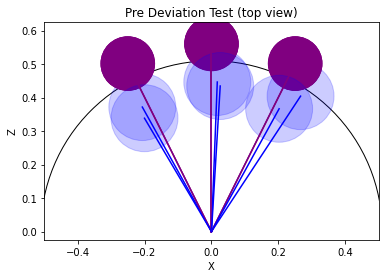

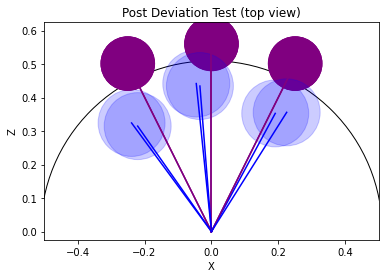

In [4]:
#Pre
pre_ball_pos = df.loc[df['Mode'] == "DeviationTest", ["Ball_Pos_X", "Ball_Pos_Y", "Ball_Pos_Z"]].iloc[0:n_iteration]
pre_hand_pos = df.loc[df['Mode'] == "DeviationTest", ["Hand_Pos_X", "Hand_Pos_Y", "Hand_Pos_Z"]].iloc[0:n_iteration]

#Post
post_ball_pos = df.loc[df['Mode'] == "DeviationTest", ["Ball_Pos_X", "Ball_Pos_Y", "Ball_Pos_Z"]].iloc[n_iteration:len(df)]
post_hand_pos = df.loc[df['Mode'] == "DeviationTest", ["Hand_Pos_X", "Hand_Pos_Y", "Hand_Pos_Z"]].iloc[n_iteration:len(df)]


def draw_top_view(ball_pos, hand_pos, title):
    ax = create_fig([-0.5,0.5], [-0.2,0.8], True)  
    ax.set_ylabel('Z')
    ax.set_xlabel('X')
    ax.set_title(title)
    ax.add_artist( plt.Circle((0,0), arm_length, color='black', alpha=1, fill = False))
    for i in range(len(ball_pos)):
        ball = plt.Circle((ball_pos.iloc[i,0], ball_pos.iloc[i,2]), ball_radius, color='purple', alpha=1, fill = True)
        ax.add_artist(ball)
        plt.plot([0, ball_pos.iloc[i,0]], [0,  ball_pos.iloc[i,2]], 'purple')
        hand = plt.Circle((hand_pos.iloc[i,0], hand_pos.iloc[i,2]),hand_radius, color='b', alpha=alpha_hand, fill = True)
        plt.plot([0, hand_pos.iloc[i,0]], [0,  hand_pos.iloc[i,2]], 'blue')
        ax.add_artist(hand)

draw_top_view(pre_ball_pos, pre_hand_pos, "Pre Deviation Test (top view)")
draw_top_view(post_ball_pos, post_hand_pos, "Post Deviation Test (top view)")


def draw_front_view(ball_pos, hand_pos, title):
    ax = create_fig([-0.5,0.5], [0.5,1.5], True)  
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title(title)
    for i in range(len(ball_pos)):
        ball = plt.Circle((ball_pos.iloc[i,0], ball_pos.iloc[i,1]), ball_radius, color='purple', alpha=1, fill = True)
        ax.add_artist(ball)
        hand = plt.Circle((hand_pos.iloc[i,0], hand_pos.iloc[i,1]),hand_radius, color='b', alpha=alpha_hand, fill = True)
        ax.add_artist(hand)
#draw_front_view(pre_ball_pos, pre_hand_pos, "Pre Deviation Test (front view)")
#draw_front_view(post_ball_pos, post_hand_pos, "Post Deviation Test (front view)")'''



### Deviation Angle

Pre deviation: mean angle: 3.5936242788820283
Post deviation: mean angle: 6.0682296713509025


Text(0.5, 1.0, 'Post deviation angle')

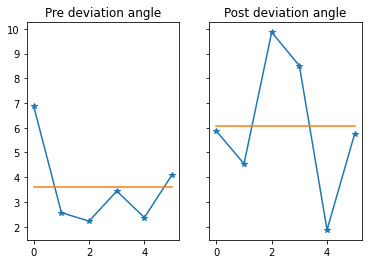

In [5]:
def angle_between_vec(vec1, vec2):
    unit_vec1 = vec1 / np.linalg.norm(vec1)
    unit_vec2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit_vec1, unit_vec2)
    angle = np.arccos(dot_product)
    return np.rad2deg(angle)

pre_dev = []
post_dev = []
for i in range(len(pre_ball_pos)):
    pre_dev.append(angle_between_vec(pre_ball_pos.iloc[i, [0,2]], pre_hand_pos.iloc[i, [0,2]]))

for i in range(len(pre_ball_pos)):
    post_dev.append(angle_between_vec(post_ball_pos.iloc[i, [0,2]], post_hand_pos.iloc[i, [0,2]]))
    
fig, axs = plt.subplots(1,2, sharex='col', sharey='row')
#2D
axs[0].plot(pre_dev, '*-')
axs[0].plot(np.mean(pre_dev)*np.ones(len(pre_dev)))
print('Pre deviation: mean angle: ' + str(np.mean(pre_dev)))
axs[0].set_title('Pre deviation angle')
axs[1].plot(post_dev, '*-')
axs[1].plot(np.mean(post_dev)*np.ones(len(post_dev)))
print('Post deviation: mean angle: ' + str(np.mean(post_dev)))
axs[1].set_title('Post deviation angle')

#3D
#pre_dev_3D = []
#post_dev_3D = []
#for i in range(len(pre_ball_pos)):
    #pre_dev_3D.append(angle_between_vec(pre_ball_pos.iloc[i], pre_hand_pos.iloc[i]))

#for i in range(len(pre_ball_pos)):
    #post_dev_3D.append(angle_between_vec(post_ball_pos.iloc[i], post_hand_pos.iloc[i]))
#axs[1, 0].plot(pre_dev_3D)
#axs[1, 0].plot(np.mean(pre_dev_3D)*np.ones(len(pre_dev_3D)))
#print('Pre deviation: mean angle 3D: ' + str(np.mean(pre_dev_3D)))
#axs[1, 0].set_title('Pre 3D')
#axs[1, 1].plot(post_dev_3D)
#axs[1, 1].plot(np.mean(post_dev_3D)*np.ones(len(post_dev_3D)))
#print('Post deviation: mean angle 3D: ' + str(np.mean(post_dev_3D)))
#axs[1, 1].set_title('Post 3D')



### Specific Trial

In [6]:
def draw_specific_top_view(ball_pos, hand_pos, index):
    ax = create_fig([-0.5,0.5], [-0.2,0.8], True)  
    ax.set_ylabel('Z')
    ax.set_xlabel('X')
    ax.set_title("Trial #" + str(index))
    ball = plt.Circle((ball_pos.iloc[index,0], ball_pos.iloc[index,2]), ball_radius, color='purple', alpha=1, fill = True)
    plt.plot([0, ball_pos.iloc[index,0]], [0,  ball_pos.iloc[index,2]], 'purple')
    ax.add_artist(ball)
    hand = plt.Circle((hand_pos.iloc[index,0], hand_pos.iloc[index,2]), hand_radius, color='b', alpha=alpha_hand, fill = True)
    plt.plot([0, hand_pos.iloc[index,0]], [0,  hand_pos.iloc[index,2]], 'blue')
    ax.add_artist(hand)
    ax.add_artist( plt.Circle((0,0), arm_length, color='black', alpha=1, fill = False))
    plt.show()


index = 4
#draw_specific_top_view(post_ball_pos, post_hand_pos, index)
#print("The deviation angle for this trial is " + str(angle_between_vec(pre_ball_pos.iloc[index, [0,2]], pre_hand_pos.iloc[index, [0,2]])))

# Prism Adaptation

There is 40 iterations of prism adaptation in this file.


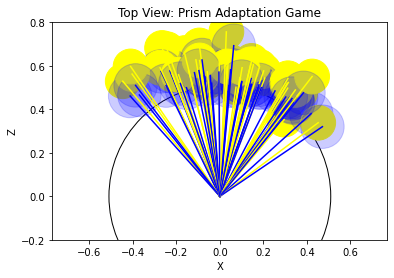

In [7]:
n_iteration = int(len(df.loc[df['Mode'] == "PrismAdaptation"]));
print("There is " + str(n_iteration) + " iterations of prism adaptation in this file.")

ball_pos = df.loc[df['Mode'] == "PrismAdaptation", ["Ball_Pos_X", "Ball_Pos_Y", "Ball_Pos_Z"]]
hand_pos = df.loc[df['Mode'] == "PrismAdaptation", ["Hand_Pos_X", "Hand_Pos_Y", "Hand_Pos_Z"]]


def draw_top_view(ball_pos, hand_pos, title):
    ax = create_fig([-0.5,0.5], [-0.2,0.8], True)  
    ax.set_ylabel('Z')
    ax.set_xlabel('X')
    ax.set_title(title)
    ax.add_artist( plt.Circle((0,0), arm_length, color='black', alpha=1, fill = False))
    for i in range(len(ball_pos)):
        ball = plt.Circle((ball_pos.iloc[i,0], ball_pos.iloc[i,2]), ball_radius, color='yellow', alpha=1, fill = True)
        plt.plot([0, ball_pos.iloc[i,0]], [0,  ball_pos.iloc[i,2]], 'yellow')
        ax.add_artist(ball)
        hand = plt.Circle((hand_pos.iloc[i,0], hand_pos.iloc[i,2]),hand_radius, color='b', alpha=alpha_hand, fill = True)
        plt.plot([0, hand_pos.iloc[i,0]], [0,  hand_pos.iloc[i,2]], 'blue')
        ax.add_artist(hand)
        
draw_top_view(ball_pos.iloc[0:n_iteration], hand_pos.iloc[0:n_iteration], "Top View: Prism Adaptation Game")      

### Adaptation over trials

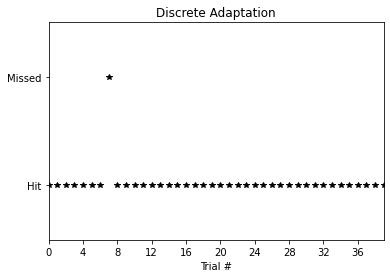

In [8]:
# Hit or Missed
state = df.loc[df['Mode'] == "PrismAdaptation", ["Ball_State"]]
hit = []

for i in range(len(state)):
    if (state.iloc[i]["Ball_State"] == "Caught") :
        hit.append(0)
    else: 
        hit.append(1)

ax = create_fig([0, len(state)-1], [-0.5, 1.5], False)
ax.set_xlabel('Trial #')
ax.set_title("Discrete Adaptation")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[1] = 'Hit'
labels[2] = 'Missed'
ax.set_yticklabels(labels)
plt.plot(hit, "*", color='black')
plt.show()

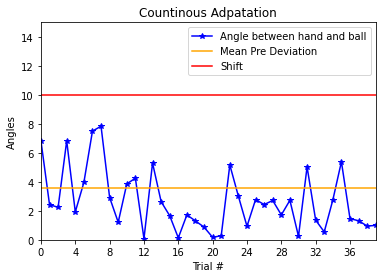

In [9]:
# Deviation Angles
dev = []
for i in range(len(ball_pos)):
    dev.append(angle_between_vec(ball_pos.iloc[i, [0,2]], hand_pos.iloc[i, [0,2]]))

ax = create_fig([0, len(dev)-1], [0, shift + 5], False)
plt.plot(dev, '*-', color='blue')
plt.plot(np.mean(pre_dev)*np.ones(len(dev)), 'orange')
plt.plot(shift*np.ones(len(dev)), 'red')

ax.set_ylabel('Angles')
ax.set_xlabel('Trial #')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Countinous Adpatation")
plt.legend(["Angle between hand and ball", "Mean Pre Deviation", "Shift"])
plt.show()
